In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [3]:
# LQ800_results_16bins_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[0]
# LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[1]
# LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[2]

# LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[9]
# LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[10]
# LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[11]

In [4]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[11]

In [9]:
results_16bins_beta00 = [LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta00 = [LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta00 = [LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta00 = [LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta00 = [LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta00 = [LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta01 = [LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta01 = [LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta01 = [LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta01 = [LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta01 = [LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta01 = [LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta03 = [LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta03 = [LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta03 = [LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta03 = [LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta03 = [LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta03 = [LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta05 = [LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta05 = [LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta05 = [LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta05 = [LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta05 = [LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta05 = [LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta07 = [LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta07 = [LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta07 = [LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta07 = [LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta07 = [LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta07 = [LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]


results_16bins_beta09 = [LQ1000_results_16bins_beta[5],LQ1200_results_16bins_beta[5],LQ1400_results_16bins_beta[5],LQ1600_results_16bins_beta[5],LQ1800_results_16bins_beta[5]]
results_16bins_plus_beta09 = [LQ1000_results_16bins_beta_plus[5],LQ1200_results_16bins_beta_plus[5],LQ1400_results_16bins_beta_plus[5],LQ1600_results_16bins_beta_plus[5],LQ1800_results_16bins_beta_plus[5]]
results_16bins_min_beta09 = [LQ1000_results_16bins_beta_min[5],LQ1200_results_16bins_beta_min[5],LQ1400_results_16bins_beta_min[5],LQ1600_results_16bins_beta_min[5],LQ1800_results_16bins_beta_min[5]]

results_MLL_KDE_beta09 = [LQ1000_results_MLL_KDE_beta[5],LQ1200_results_MLL_KDE_beta[5],LQ1400_results_MLL_KDE_beta[5],LQ1600_results_MLL_KDE_beta[5],LQ1800_results_MLL_KDE_beta[5]]
results_MLL_KDE_plus_beta09 = [LQ1000_results_MLL_KDE_beta_plus[5],LQ1200_results_MLL_KDE_beta_plus[5],LQ1400_results_MLL_KDE_beta_plus[5],LQ1600_results_MLL_KDE_beta_plus[5],LQ1800_results_MLL_KDE_beta_plus[5]]
results_MLL_KDE_min_beta09 = [LQ1000_results_MLL_KDE_beta_min[5],LQ1200_results_MLL_KDE_beta_min[5],LQ1400_results_MLL_KDE_beta_min[5],LQ1600_results_MLL_KDE_beta_min[5],LQ1800_results_MLL_KDE_beta_min[5]]


results_16bins_beta1 = [LQ1000_results_16bins_beta[6],LQ1200_results_16bins_beta[6],LQ1400_results_16bins_beta[6],LQ1600_results_16bins_beta[6],LQ1800_results_16bins_beta[6]]
results_16bins_plus_beta1 = [LQ1000_results_16bins_beta_plus[6],LQ1200_results_16bins_beta_plus[6],LQ1400_results_16bins_beta_plus[6],LQ1600_results_16bins_beta_plus[6],LQ1800_results_16bins_beta_plus[6]]
results_16bins_min_beta1 = [LQ1000_results_16bins_beta_min[6],LQ1200_results_16bins_beta_min[6],LQ1400_results_16bins_beta_min[6],LQ1600_results_16bins_beta_min[6],LQ1800_results_16bins_beta_min[6]]

results_MLL_KDE_beta1 = [LQ1000_results_MLL_KDE_beta[6],LQ1200_results_MLL_KDE_beta[6],LQ1400_results_MLL_KDE_beta[6],LQ1600_results_MLL_KDE_beta[6],LQ1800_results_MLL_KDE_beta[6]]
results_MLL_KDE_plus_beta1 = [LQ1000_results_MLL_KDE_beta_plus[6],LQ1200_results_MLL_KDE_beta_plus[6],LQ1400_results_MLL_KDE_beta_plus[6],LQ1600_results_MLL_KDE_beta_plus[6],LQ1800_results_MLL_KDE_beta_plus[6]]
results_MLL_KDE_min_beta1 = [LQ1000_results_MLL_KDE_beta_min[6],LQ1200_results_MLL_KDE_beta_min[6],LQ1400_results_MLL_KDE_beta_min[6],LQ1600_results_MLL_KDE_beta_min[6],LQ1800_results_MLL_KDE_beta_min[6]]

In [10]:
results_16bins_beta00.append( (results_16bins_beta00[-1] - results_16bins_beta00[-2]) + results_16bins_beta00[-1] )
results_16bins_plus_beta00.append( (results_16bins_plus_beta00[-1] - results_16bins_plus_beta00[-2]) + results_16bins_plus_beta00[-1] )
results_16bins_min_beta00.append( (results_16bins_min_beta00[-1] - results_16bins_min_beta00[-2]) + results_16bins_min_beta00[-1] )

results_MLL_KDE_beta00.append( (results_MLL_KDE_beta00[-1] - results_MLL_KDE_beta00[-2]) + results_MLL_KDE_beta00[-1] )
results_MLL_KDE_plus_beta00.append( (results_MLL_KDE_plus_beta00[-1] - results_MLL_KDE_plus_beta00[-2]) + results_MLL_KDE_plus_beta00[-1] )
results_MLL_KDE_min_beta00.append( (results_MLL_KDE_min_beta00[-1] - results_MLL_KDE_min_beta00[-2]) + results_MLL_KDE_min_beta00[-1] )


results_16bins_beta01.append( (results_16bins_beta01[-1] - results_16bins_beta01[-2]) + results_16bins_beta01[-1] )
results_16bins_plus_beta01.append( (results_16bins_plus_beta01[-1] - results_16bins_plus_beta01[-2]) + results_16bins_plus_beta01[-1] )
results_16bins_min_beta01.append( (results_16bins_min_beta01[-1] - results_16bins_min_beta01[-2]) + results_16bins_min_beta01[-1] )

results_MLL_KDE_beta01.append( (results_MLL_KDE_beta01[-1] - results_MLL_KDE_beta01[-2]) + results_MLL_KDE_beta01[-1] )
results_MLL_KDE_plus_beta01.append( (results_MLL_KDE_plus_beta01[-1] - results_MLL_KDE_plus_beta01[-2]) + results_MLL_KDE_plus_beta01[-1] )
results_MLL_KDE_min_beta01.append( (results_MLL_KDE_min_beta01[-1] - results_MLL_KDE_min_beta01[-2]) + results_MLL_KDE_min_beta01[-1] )


results_16bins_beta03.append( (results_16bins_beta03[-1] - results_16bins_beta03[-2]) + results_16bins_beta03[-1] )
results_16bins_plus_beta03.append( (results_16bins_plus_beta03[-1] - results_16bins_plus_beta03[-2]) + results_16bins_plus_beta03[-1] )
results_16bins_min_beta03.append( (results_16bins_min_beta03[-1] - results_16bins_min_beta03[-2]) + results_16bins_min_beta03[-1] )

results_MLL_KDE_beta03.append( (results_MLL_KDE_beta03[-1] - results_MLL_KDE_beta03[-2]) + results_MLL_KDE_beta03[-1] )
results_MLL_KDE_plus_beta03.append( (results_MLL_KDE_plus_beta03[-1] - results_MLL_KDE_plus_beta03[-2]) + results_MLL_KDE_plus_beta03[-1] )
results_MLL_KDE_min_beta03.append( (results_MLL_KDE_min_beta03[-1] - results_MLL_KDE_min_beta03[-2]) + results_MLL_KDE_min_beta03[-1] )


results_16bins_beta05.append( (results_16bins_beta05[-1] - results_16bins_beta05[-2]) + results_16bins_beta05[-1] )
results_16bins_plus_beta05.append( (results_16bins_plus_beta05[-1] - results_16bins_plus_beta05[-2]) + results_16bins_plus_beta05[-1] )
results_16bins_min_beta05.append( (results_16bins_min_beta05[-1] - results_16bins_min_beta05[-2]) + results_16bins_min_beta05[-1] )

results_MLL_KDE_beta05.append( (results_MLL_KDE_beta05[-1] - results_MLL_KDE_beta05[-2]) + results_MLL_KDE_beta05[-1] )
results_MLL_KDE_plus_beta05.append( (results_MLL_KDE_plus_beta05[-1] - results_MLL_KDE_plus_beta05[-2]) + results_MLL_KDE_plus_beta05[-1] )
results_MLL_KDE_min_beta05.append( (results_MLL_KDE_min_beta05[-1] - results_MLL_KDE_min_beta05[-2]) + results_MLL_KDE_min_beta05[-1] )


results_16bins_beta07.append( (results_16bins_beta07[-1] - results_16bins_beta07[-2]) + results_16bins_beta07[-1] )
results_16bins_plus_beta07.append( (results_16bins_plus_beta07[-1] - results_16bins_plus_beta07[-2]) + results_16bins_plus_beta07[-1] )
results_16bins_min_beta07.append( (results_16bins_min_beta07[-1] - results_16bins_min_beta07[-2]) + results_16bins_min_beta07[-1] )

results_MLL_KDE_beta07.append( (results_MLL_KDE_beta07[-1] - results_MLL_KDE_beta07[-2]) + results_MLL_KDE_beta07[-1] )
results_MLL_KDE_plus_beta07.append( (results_MLL_KDE_plus_beta07[-1] - results_MLL_KDE_plus_beta07[-2]) + results_MLL_KDE_plus_beta07[-1] )
results_MLL_KDE_min_beta07.append( (results_MLL_KDE_min_beta07[-1] - results_MLL_KDE_min_beta07[-2]) + results_MLL_KDE_min_beta07[-1] )


results_16bins_beta09.append( (results_16bins_beta09[-1] - results_16bins_beta09[-2]) + results_16bins_beta09[-1] )
results_16bins_plus_beta09.append( (results_16bins_plus_beta09[-1] - results_16bins_plus_beta09[-2]) + results_16bins_plus_beta09[-1] )
results_16bins_min_beta09.append( (results_16bins_min_beta09[-1] - results_16bins_min_beta09[-2]) + results_16bins_min_beta09[-1] )

results_MLL_KDE_beta09.append( (results_MLL_KDE_beta09[-1] - results_MLL_KDE_beta09[-2]) + results_MLL_KDE_beta09[-1] )
results_MLL_KDE_plus_beta09.append( (results_MLL_KDE_plus_beta09[-1] - results_MLL_KDE_plus_beta09[-2]) + results_MLL_KDE_plus_beta09[-1] )
results_MLL_KDE_min_beta09.append( (results_MLL_KDE_min_beta09[-1] - results_MLL_KDE_min_beta09[-2]) + results_MLL_KDE_min_beta09[-1] )


results_16bins_beta1.append( (results_16bins_beta1[-1] - results_16bins_beta1[-2]) + results_16bins_beta1[-1] )
results_16bins_plus_beta1.append( (results_16bins_plus_beta1[-1] - results_16bins_plus_beta1[-2]) + results_16bins_plus_beta1[-1] )
results_16bins_min_beta1.append( (results_16bins_min_beta1[-1] - results_16bins_min_beta1[-2]) + results_16bins_min_beta1[-1] )

results_MLL_KDE_beta1.append( (results_MLL_KDE_beta1[-1] - results_MLL_KDE_beta1[-2]) + results_MLL_KDE_beta1[-1] )
results_MLL_KDE_plus_beta1.append( (results_MLL_KDE_plus_beta1[-1] - results_MLL_KDE_plus_beta1[-2]) + results_MLL_KDE_plus_beta1[-1] )
results_MLL_KDE_min_beta1.append( (results_MLL_KDE_min_beta1[-1] - results_MLL_KDE_min_beta1[-2]) + results_MLL_KDE_min_beta1[-1] )

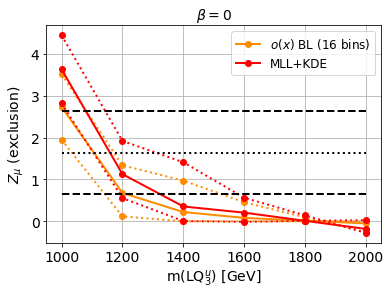

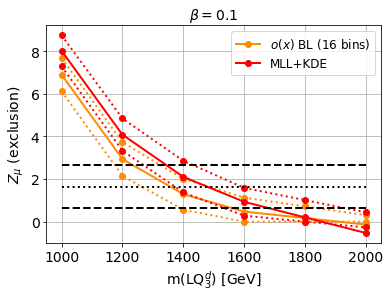

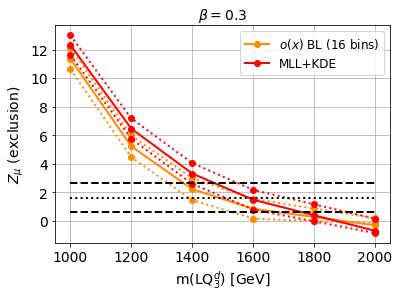

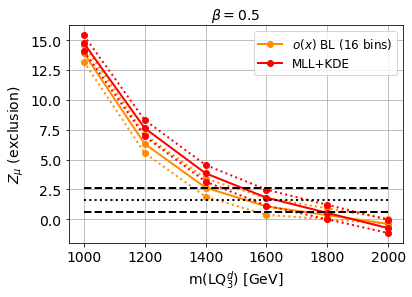

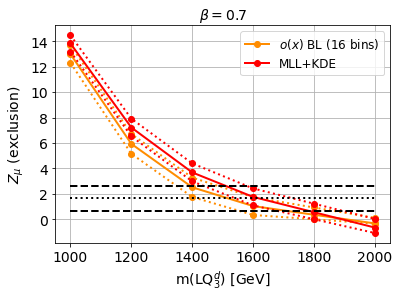

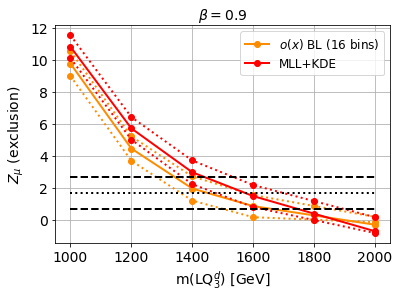

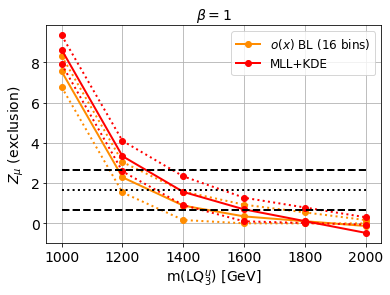

In [11]:
#masses = [800, 1000, 1200, 1400, 1600, 1800]
masses = [1000, 1200, 1400, 1600, 1800, 2000]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta00, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta00, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta01, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta1, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta1, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^u$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [12]:
# Interpolation, cubic
res_f_16bins_beta00 = interp1d(masses, results_16bins_beta00, kind='quadratic')
res_f_16bins_plus_beta00 = interp1d(masses, results_16bins_plus_beta00, kind='quadratic')
res_f_16bins_min_beta00 = interp1d(masses, results_16bins_min_beta00, kind='quadratic')
res_f_MLL_KDE_beta00 = interp1d(masses, results_MLL_KDE_beta00, kind='quadratic')
res_f_MLL_KDE_plus_beta00 = interp1d(masses, results_MLL_KDE_plus_beta00, kind='quadratic')
res_f_MLL_KDE_min_beta00 = interp1d(masses, results_MLL_KDE_min_beta00, kind='quadratic')

res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

res_f_16bins_beta1 = interp1d(masses, results_16bins_beta1, kind='quadratic')
res_f_16bins_plus_beta1 = interp1d(masses, results_16bins_plus_beta1, kind='quadratic')
res_f_16bins_min_beta1 = interp1d(masses, results_16bins_min_beta1, kind='quadratic')
res_f_MLL_KDE_beta1 = interp1d(masses, results_MLL_KDE_beta1, kind='quadratic')
res_f_MLL_KDE_plus_beta1 = interp1d(masses, results_MLL_KDE_plus_beta1, kind='quadratic')
res_f_MLL_KDE_min_beta1 = interp1d(masses, results_MLL_KDE_min_beta1, kind='quadratic')

In [13]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1100, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [14]:
beta = [0,0.1,0.3,0.5,0.7,0.9,1]


mass_16bins_beta00 = solvemass(res_f_16bins_beta00, 1.64)
mass_16bins_plus_beta00 = solvemass(res_f_16bins_plus_beta00, 1.64)
mass_16bins_min_beta00 = solvemass(res_f_16bins_min_beta00, 1.64)
mass_MLL_beta00 = solvemass(res_f_MLL_KDE_beta00, 1.64)
mass_MLL_plus_beta00 = solvemass(res_f_MLL_KDE_plus_beta00, 1.64)
mass_MLL_min_beta00 = solvemass(res_f_MLL_KDE_min_beta00, 1.64)

mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins_beta1 = solvemass(res_f_16bins_beta1, 1.64)
mass_16bins_plus_beta1 = solvemass(res_f_16bins_plus_beta1, 1.64)
mass_16bins_min_beta1 = solvemass(res_f_16bins_min_beta1, 1.64)
mass_MLL_beta1 = solvemass(res_f_MLL_KDE_beta1, 1.64)
mass_MLL_plus_beta1 = solvemass(res_f_MLL_KDE_plus_beta1, 1.64)
mass_MLL_min_beta1 = solvemass(res_f_MLL_KDE_min_beta1, 1.64)

mass_16bins = [mass_16bins_beta00, mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09, mass_16bins_beta1]
mass_16bins_plus = [mass_16bins_plus_beta00, mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09, mass_16bins_plus_beta1]
mass_16bins_min = [mass_16bins_min_beta00, mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09, mass_16bins_min_beta1]
mass_MLL = [mass_MLL_beta00, mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09, mass_MLL_beta1]
mass_MLL_plus = [mass_MLL_plus_beta00, mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09, mass_MLL_plus_beta1]
mass_MLL_min = [mass_MLL_min_beta00, mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09, mass_MLL_min_beta1]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[1084.531103498586, 1340.8446736893554, 1466.2355859195131, 1507.5308088016232, 1496.6024071097395, 1441.183031724207, 1251.2252373229119]
[1154.7014553305098, 1468.694780066157, 1582.1270927998203, 1626.248595662139, 1619.5368853984523, 1577.0399723211883, 1385.6397932631355]
[1022.5144174124372, 1242.3277509196503, 1383.253813663487, 1422.6325759839915, 1410.6644092333904, 1350.7502942108474, 1193.2662035855242]
[1143.4196108209724, 1467.3937609325947, 1578.9143371115401, 1623.2703425510317, 1616.7192871426096, 1573.8066827468483, 1385.6700691306933]
[1258.9562778735892, 1588.0296791505657, 1695.6965152125654, 1728.8654167056345, 1726.3863253567517, 1699.3140728588855, 1519.1125630892736]
[1083.4742834831236, 1364.3923271501599, 1491.3632322619305, 1538.6034395667807, 1528.7075308353842, 1465.3476299319973, 1275.525591679931]


In [15]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998

beta_ATLAS = [0.0,0.0055605,0.010101,0.011175,0.016681,0.020202,0.02206,0.027174,0.030303,0.031929,0.036353,0.040404,0.040563,0.04484,0.049374,0.050505,0.054477,0.06021,0.060606,0.066647,0.070707,0.073462,0.080396,0.080808,0.087386,0.090909,0.094345,0.10101,0.10154,0.10947,0.11111,0.11841,0.12121,0.12873,0.13131,0.14064,0.14141,0.15152,0.15449,0.16162,0.17034,0.17172,0.18182,0.18895,0.19192,0.20202,0.21133,0.21212,0.22222,0.23232,0.23986,0.24242,0.25253,0.26263,0.27273,0.27806,0.28283,0.29293,0.30303,0.31313,0.32323,0.33188,0.33333,0.34343,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41414,0.41599,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68551,0.68687,0.69697,0.70707,0.71717,0.72727,0.73737,0.74747,0.75758,0.75862,0.76768,0.77778,0.78788,0.79798,0.79895,0.80808,0.81818,0.82745,0.82828,0.83838,0.84848,0.85245,0.85859,0.86869,0.87721,0.87879,0.88889,0.89899,0.90151,0.90909,0.91919,0.92359,0.92929,0.93939,0.94203,0.94949,0.95666,0.9596,0.96827,0.9697,0.97795,0.9798,0.9867,0.9899,0.99521,1.0]
mass_Z95CL_ATLAS = [771.93,787.88,800.86,804.04,820.2,830.76,836.36,852.53,863.22,868.69,884.85,900.42,901.01,917.17,933.33,937.08,949.49,965.66,966.72,981.82,991.76,997.98,1014.1,1015.2,1030.3,1038.8,1046.5,1061.5,1062.6,1078.8,1082.0,1094.9,1099.7,1111.1,1114.9,1127.3,1128.3,1140.3,1143.4,1151.2,1159.6,1161.0,1170.1,1175.8,1178.2,1185.7,1191.9,1192.5,1198.7,1204.3,1208.1,1209.4,1214.1,1218.4,1222.3,1224.2,1225.9,1229.3,1232.5,1235.4,1238.2,1240.4,1240.8,1243.2,1245.4,1247.5,1249.5,1251.4,1253.1,1254.8,1256.3,1256.6,1257.7,1258.9,1260.1,1261.1,1262.1,1262.9,1263.6,1264.3,1264.8,1265.2,1265.6,1265.8,1265.9,1265.9,1265.8,1265.6,1265.3,1264.9,1264.4,1263.8,1263.1,1262.3,1261.3,1260.3,1259.1,1257.8,1256.6,1256.4,1254.7,1252.9,1250.9,1248.7,1246.3,1243.6,1240.7,1240.4,1237.4,1233.6,1229.4,1224.7,1224.2,1219.6,1213.9,1208.1,1207.6,1201.5,1194.8,1191.9,1188.2,1181.7,1175.8,1174.8,1168.3,1161.4,1159.6,1154.3,1146.9,1143.4,1138.7,1129.7,1127.3,1119.3,1111.1,1107.2,1094.9,1092.7,1078.8,1075.5,1062.6,1056.7,1046.5,1037.4]

beta_ATLAS_plus1sig = [0, 0.013679890560875513, 0.024623803009575923, 0.04377564979480164, 0.06703146374829001, 0.10807113543091655, 0.1518467852257182, 0.18331053351573187, 0.2476060191518467, 0.3283173734610123, 0.4131326949384405, 0.49247606019151846, 0.5567715458276333, 0.6333789329685362, 0.6963064295485636, 0.759233926128591, 0.8221614227086184, 0.8645690834473324, 0.9069767441860465, 0.945280437756498, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_plus1sig = [619.8852772466539, 700.9560229445507, 762.1414913957935, 824.8565965583174, 892.1606118546845, 980.8795411089866, 1043.5946462715106, 1084.8948374760994, 1124.6653919694072, 1149.1395793499044, 1169.0248565965583, 1176.6730401529635, 1176.6730401529635, 1172.0841300191205, 1162.906309751434, 1149.1395793499044, 1127.7246653919694, 1101.7208413001913, 1060.4206500956022, 1016.0611854684512, 965.5831739961759, 907.4569789674952]

beta_ATLAS_minus1sig = [0, 0.024623803009575923, 0.046511627906976744, 0.06703146374829001, 0.08755129958960328, 0.10807113543091655, 0.13406292749658003, 0.1709986320109439, 0.24213406292749656, 0.32694938440492477, 0.4131326949384405, 0.5047879616963065, 0.5882352941176471, 0.6716826265389877, 0.7400820793433652, 0.8084815321477428, 0.8618331053351573, 0.8946648426812586, 0.9151846785225718, 0.9343365253077975, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_minus1sig = [846.2715105162524, 922.7533460803058, 1000.7648183556405, 1054.302103250478, 1107.8393881453155, 1152.1988527724666, 1196.5583173996174, 1239.3881453154877, 1280.6883365200765, 1302.1032504780114, 1318.9292543021033, 1323.5181644359463, 1326.5774378585086, 1321.9885277246653, 1312.810707456979, 1295.9847036328872, 1277.6290630975143, 1256.2141491395794, 1233.2695984703632, 1205.7361376673039, 1170.5544933078395, 1139.9617590822181]

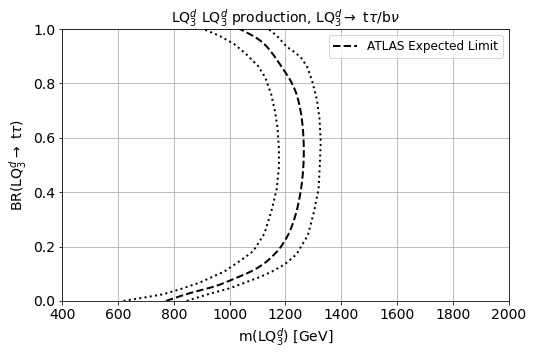

In [16]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

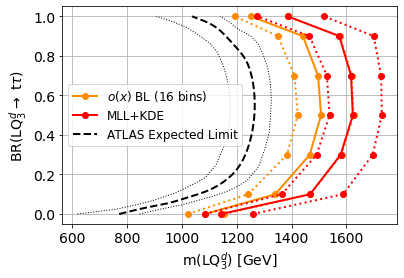

In [17]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':o', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':o', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':o', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':o', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

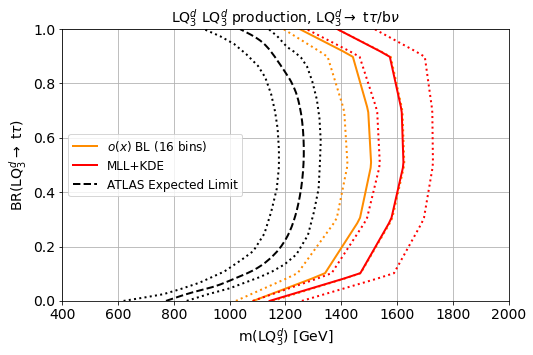

In [18]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='linear')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='linear')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='linear')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='linear')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='linear')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='linear')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

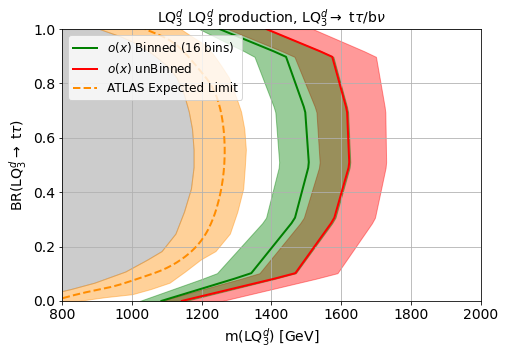

In [19]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('exclusion_LQdown_14TeV_300fb.pdf', bbox_inches='tight')
plt.show()

In [20]:
# BR values
print(plotX_beta)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [21]:
# Mass values (BL)
print( mass_Z95CL_16bins(plotX_beta) )
print( mass_Z95CL_16bins_plus(plotX_beta) )
print( mass_Z95CL_16bins_min(plotX_beta) )

[1084.5311035  1136.83999537 1189.14888725 1241.45777913 1293.766671
 1342.12417279 1354.91916384 1367.71415488 1380.50914593 1393.30413697
 1406.09912801 1418.89411906 1431.6891101  1444.48410114 1457.27909219
 1467.4997254  1471.71352365 1475.9273219  1480.14112016 1484.35491841
 1488.56871666 1492.78251492 1496.99631317 1501.21011142 1505.42390967
 1506.97323729 1505.85809426 1504.74295123 1503.6278082  1502.51266517
 1501.39752214 1500.28237911 1499.16723608 1498.05209305 1496.93695002
 1492.6438803  1486.98884199 1481.33380369 1475.67876538 1470.02372708
 1464.36868877 1458.71365047 1453.05861216 1447.40357386 1441.74853555
 1406.29282459 1367.52592777 1328.75903096 1289.99213414 1251.22523732]
[1154.70145533 1218.78172568 1282.86199604 1346.94226639 1411.02253675
 1469.85225265 1481.42697843 1493.00170422 1504.57643001 1516.1511558
 1527.72588159 1539.30060738 1550.87533317 1562.45005896 1574.02478475
 1583.47775105 1587.97994522 1592.48213939 1596.98433356 1601.48652773
 1605.98

In [22]:
# Mass values (MLL)
print( mass_Z95CL_MLL(plotX_beta) )
print( mass_Z95CL_MLL_plus(plotX_beta) )
print( mass_Z95CL_MLL_min(plotX_beta) )

[1143.41961082 1209.53678431 1275.65395781 1341.7711313  1407.88830479
 1468.531726   1479.91137663 1491.29102726 1502.67067789 1514.05032852
 1525.42997915 1536.80962978 1548.18928041 1559.56893104 1570.94858167
 1580.27217401 1584.79829702 1589.32442002 1593.85054302 1598.37666603
 1602.90278903 1607.42891204 1611.95503504 1616.48115804 1621.00728105
 1622.93610503 1622.26762999 1621.59915495 1620.93067991 1620.26220486
 1619.59372982 1618.92525478 1618.25677974 1617.5883047  1616.91982966
 1613.65410111 1609.27526393 1604.89642675 1600.51758956 1596.13875238
 1591.7599152  1587.38107801 1583.00224083 1578.62340365 1574.24456647
 1539.25097821 1500.85575094 1462.46052367 1424.0652964  1385.67006913]
[1258.95627787 1326.11411487 1393.27195186 1460.42978886 1527.58762585
 1589.12832033 1600.11473218 1611.10114402 1622.08755586 1633.07396771
 1644.06037955 1655.04679139 1666.03320324 1677.01961508 1688.00602692
 1696.71188975 1700.09647153 1703.48105332 1706.8656351  1710.25021689
 1713